# Poisson Distribution

Some example code for the Poisson distribution.

Taken from some of the links below.

You should answer the questions in the slides using code.

See if you can re-create some of the plots of the Poisson too.

## 1. Simulating random variables from a Poisson distribution

In [44]:
import numpy as np
from numpy import random

# Generate an array of 10 values that follow a Poisson distribution, X ~ Pois(lambda = 4.5)
random.poisson(lam=4.5, size=10)

array([4, 2, 2, 4, 8, 1, 4, 3, 6, 4])

In [45]:
# If we want a bigger sample?
random.poisson(lam=4.5, size=int(1e2))

array([ 5,  2,  4,  4,  2,  4,  3,  8,  3,  5,  3,  2,  7,  2,  6,  2,  3,
        2,  5,  5,  5,  5,  1,  3,  3,  8,  5,  5,  7,  5,  4,  7,  4,  7,
        2,  7,  6,  4,  6,  1,  4,  4,  4,  7,  4,  6,  5,  3,  5,  7,  6,
        1,  3,  1,  3,  5,  8,  7,  2, 12,  0,  4,  6,  5,  0,  4,  6,  9,
        2,  6,  3,  3,  1,  2,  3,  2,  3,  6,  6,  2,  2,  2,  4,  3,  2,
        1,  9,  2,  1,  4,  4,  7,  3,  4,  2,  5,  6,  5,  7,  1])

In [46]:
# What if I want everyone to have the same sample?
random.seed(10)
random.poisson(lam=5, size=10)

# Why would we want that?

array([4, 3, 3, 8, 7, 5, 2, 7, 4, 7])

## 2. Calculating single probablities using the Poisson distribution

In [47]:
from scipy.stats import poisson

# Calculate Poisson probability P(X = 4) when X ~ Pois(lambda = 4.5)
poisson.pmf(k=4, mu=4.5)

0.18980762054012446

In [51]:
# Calculating explicitly takes more effort and is less easy to edit for new problems:
import math
from math import factorial, exp
lam = 4.5
k = 4
exp(-lam) * (lam ** k) / factorial(k)

0.18980762054012443

In [52]:
# Printing some probabilities:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
out1 = poisson.pmf(k=x, mu=4.5)
out1

array([0.011109  , 0.04999048, 0.11247859, 0.16871788, 0.18980762,
       0.17082686, 0.12812014, 0.08236295, 0.04632916, 0.02316458,
       0.01042406])

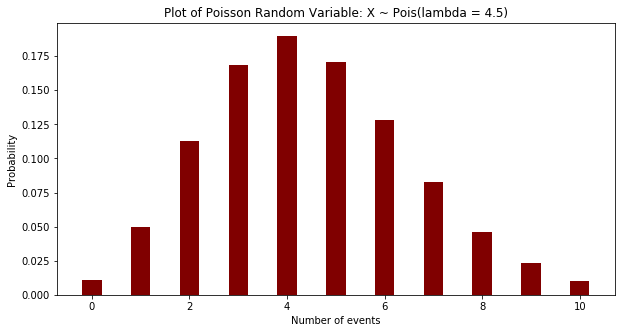

In [53]:
# Creating a plot:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(x, out1, color ='maroon', width = 0.4)

plt.xlabel("Number of events")
plt.ylabel("Probability")
plt.title("Plot of Poisson Random Variable: X ~ Pois(lambda = 4.5)")
plt.show()


## 3. Calculating cumulative probablities using the Poisson distribution

In [54]:
# Calculate Poisson probability P(X <= 3) when X ~ Pois(lambda = 4.5)
poisson.cdf(k=3, mu=4.5)


0.34229595583459105

In [55]:
# Seeing what this actually does:
out2 = poisson.cdf(k=x, mu=4.5)
out2

array([0.011109  , 0.06109948, 0.17357807, 0.34229596, 0.53210358,
       0.70293043, 0.83105058, 0.91341353, 0.95974269, 0.98290727,
       0.99333133])

## 4. Visualising a random sample from the Poisson:

Counter({4: 179, 3: 169, 5: 166, 2: 146, 6: 111, 7: 88, 1: 56, 8: 41, 9: 24, 0: 11, 10: 5, 11: 2, 12: 1, 13: 1})


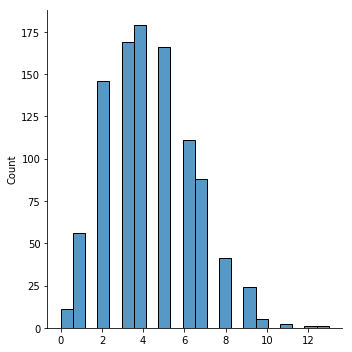

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

y = random.poisson(lam=4.5, size=1000)

# Find the frequencies:
freq = Counter(y)
print(freq)

sns.displot(y)

plt.show()
# More on displot: https://seaborn.pydata.org/generated/seaborn.displot.html

## Some further reading:

Some detail about some functions here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
and here:
https://www.w3schools.com/python/numpy/numpy_random_poisson.asp
and here:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

Excellent code and examples here:
https://www.statology.org/poisson-distribution-python/
and here:
https://vitalflux.com/poisson-distribution-explained-with-python-examples/

See how to make barplots neater here:
https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4
and here:
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
and here:
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

Some more code and nice examples here:
https://pyshark.com/poisson-distribution-and-poisson-process-in-python/
and here:
https://radzion.com/blog/probability/poisson
and here:
https://hadrienj.github.io/posts/Essential-Math-poisson_distribution/

## 5. Fitting a Poisson distribution to given data:

In [74]:
# First, let's simulate some data:
from scipy.stats import poisson
from numpy import random
random.seed(13)
out = random.poisson(lam=4.5, size=10)
out
# This could be number of events per hour, from 10 hours of data:

array([10,  3,  3,  5,  3,  5,  1,  4,  4,  5])

In [80]:
# What is my best guess at the population parameter lambda if I can only see the data?
lambda_hat = sum(out) / len(out)
lambda_hat
# My best guess is 4.3 events per hour, on average
# I can then use this distribution to make predictions, and can use
# plots to see how well these fit to my data

4.3

### Task:

1. See what is happening here - this is a very important idea called Maximum Likelihood Estimation: https://online.stat.psu.edu/stat504/lesson/1/1.5
2. See if you can re-produce the plot at the above link, but in Python code.